# WeatherPy
___________________________________________________________________________________________

## Starter Code to Generate Random Geographic Coordinates and a List of Cities


In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress 


# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the citipy Library


In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 598


## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
api_key_units = f"{url}appid={weather_api_key}&units={units}"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = api_key_units + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather['sys']["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | lebu
Processing Record 2 of Set 1 | constantia
Processing Record 3 of Set 1 | port-aux-francais
Processing Record 4 of Set 1 | georgetown
Processing Record 5 of Set 1 | la passe
Processing Record 6 of Set 1 | aasiaat
Processing Record 7 of Set 1 | adamstown
Processing Record 8 of Set 1 | waddan
Processing Record 9 of Set 1 | tanout
Processing Record 10 of Set 1 | tiksi
Processing Record 11 of Set 1 | grytviken
Processing Record 12 of Set 1 | hermanus
Processing Record 13 of Set 1 | pacific grove
Processing Record 14 of Set 1 | blackmans bay
Processing Record 15 of Set 1 | port alfred
Processing Record 16 of Set 1 | bethel
Processing Record 17 of Set 1 | qarazhal
Processing Record 18 of Set 1 | villa angela
Processing Record 19 of Set 1 | ilulissat
Processing Record 20 of Set 1 | iskateley
Processing Record 21 of Set 1 | cascavel
Processing Record 22 of Set 1 | tazovsky
Processing Record 23 of Set

Processing Record 42 of Set 4 | cacapava do sul
Processing Record 43 of Set 4 | necochea
Processing Record 44 of Set 4 | zheleznogorsk
Processing Record 45 of Set 4 | collie
Processing Record 46 of Set 4 | gallivare
City not found. Skipping...
Processing Record 47 of Set 4 | laojunmiao
Processing Record 48 of Set 4 | salalah
Processing Record 49 of Set 4 | novomikhaylovskiy
Processing Record 0 of Set 5 | lorengau
Processing Record 1 of Set 5 | borovsk
Processing Record 2 of Set 5 | yambio
Processing Record 3 of Set 5 | naron
Processing Record 4 of Set 5 | chonchi
Processing Record 5 of Set 5 | vorgashor
Processing Record 6 of Set 5 | san pedro
Processing Record 7 of Set 5 | rongelap
Processing Record 8 of Set 5 | linxia chengguanzhen
Processing Record 9 of Set 5 | general conesa
Processing Record 10 of Set 5 | hangu
Processing Record 11 of Set 5 | la porte
Processing Record 12 of Set 5 | pachperwa
Processing Record 13 of Set 5 | devils lake
Processing Record 14 of Set 5 | vizinga
Proce

Processing Record 36 of Set 8 | ta`u
Processing Record 37 of Set 8 | polyarnyy
Processing Record 38 of Set 8 | zhosaly
Processing Record 39 of Set 8 | mildura
Processing Record 40 of Set 8 | el porvenir
Processing Record 41 of Set 8 | sao joao da barra
Processing Record 42 of Set 8 | atar
Processing Record 43 of Set 8 | akureyri
Processing Record 44 of Set 8 | novotroitsk
Processing Record 45 of Set 8 | capela
Processing Record 46 of Set 8 | levuka
Processing Record 47 of Set 8 | praia da vitoria
Processing Record 48 of Set 8 | orkney
Processing Record 49 of Set 8 | sikasso
Processing Record 0 of Set 9 | puerto baquerizo moreno
Processing Record 1 of Set 9 | grand gaube
Processing Record 2 of Set 9 | fort mcmurray
Processing Record 3 of Set 9 | creel
Processing Record 4 of Set 9 | laguna
Processing Record 5 of Set 9 | haiku-pauwela
Processing Record 6 of Set 9 | kronenwetter
Processing Record 7 of Set 9 | batang
Processing Record 8 of Set 9 | hevie
City not found. Skipping...
Processin

Processing Record 25 of Set 12 | hailar
Processing Record 26 of Set 12 | newman
Processing Record 27 of Set 12 | yamoussoukro
Processing Record 28 of Set 12 | tashtyp
Processing Record 29 of Set 12 | touros
Processing Record 30 of Set 12 | al hufuf
Processing Record 31 of Set 12 | bargaal
Processing Record 32 of Set 12 | banff
Processing Record 33 of Set 12 | kasane
Processing Record 34 of Set 12 | tobruk
Processing Record 35 of Set 12 | matoury
Processing Record 36 of Set 12 | terra rica
Processing Record 37 of Set 12 | summerville
Processing Record 38 of Set 12 | sao vicente
Processing Record 39 of Set 12 | labrador city
Processing Record 40 of Set 12 | aykol
City not found. Skipping...
Processing Record 41 of Set 12 | san patricio
Processing Record 42 of Set 12 | greymouth
Processing Record 43 of Set 12 | kurumkan
Processing Record 44 of Set 12 | vancouver
Processing Record 45 of Set 12 | manitowoc
Processing Record 46 of Set 12 | sanctuary point
Processing Record 47 of Set 12 | yua

In [23]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()


City          577
Lat           577
Lng           577
Max Temp      577
Humidity      577
Cloudiness    577
Wind Speed    577
Country       577
Date          577
dtype: int64

In [24]:
# Display sample data
city_data_df.head()


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,lebu,-37.6167,-73.6500,58.37,92,100,11.86,CL,1682631840
1,constantia,44.1833,28.6500,43.70,64,100,16.91,RO,1682631814
2,port-aux-francais,-49.3500,70.2167,42.69,71,83,27.51,TF,1682631840
3,georgetown,5.4112,100.3354,80.53,94,20,0.00,MY,1682631840
4,la passe,45.5549,-0.8967,62.83,90,98,3.94,FR,1682631828


In [25]:
# Export the City_Data into a csv
city_data_df.to_csv("cities.csv", index_label="City_ID")

In [26]:
# Read saved data
city_data_df = pd.read_csv("cities.csv", index_col="City_ID")

                    
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,lebu,-37.6167,-73.6500,58.37,92,100,11.86,CL,1682631840
1,constantia,44.1833,28.6500,43.70,64,100,16.91,RO,1682631814
2,port-aux-francais,-49.3500,70.2167,42.69,71,83,27.51,TF,1682631840
3,georgetown,5.4112,100.3354,80.53,94,20,0.00,MY,1682631840
4,la passe,45.5549,-0.8967,62.83,90,98,3.94,FR,1682631828


## Create the Scatter Plots Requested

### Latitude Vs. Temperature


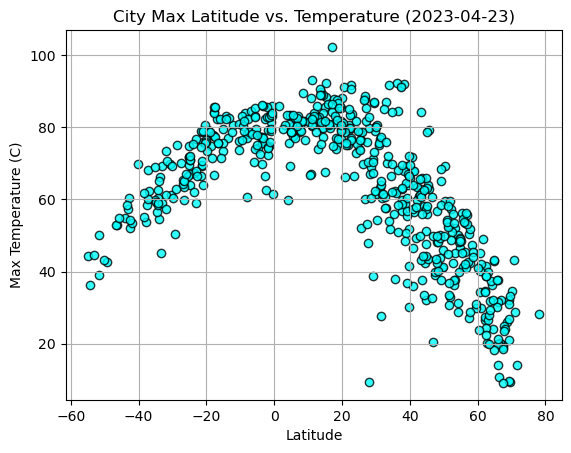

In [27]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], marker = "o", facecolors = "aqua", edgecolors = "black", alpha = 0.80)

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Temperature (2023-04-23)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")            
plt.grid(True)
            
            
# Save the figure
plt.savefig("Fig1.png")

# Show plot
plt.show()

## Latitude Vs. Humidity

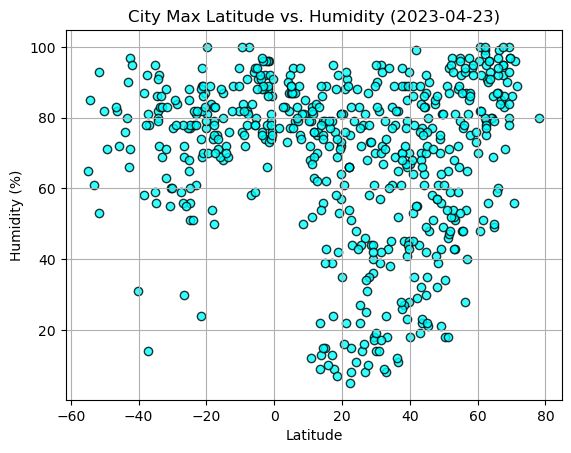

In [28]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], marker = "o", facecolors = "aqua", edgecolors = "black", alpha = 0.80)

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Humidity (2023-04-23)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")            
plt.grid(True)


# Save the figure
plt.savefig("Fig2.png")

# Show plot
plt.show()

## Latitude Vs. Cloudiness

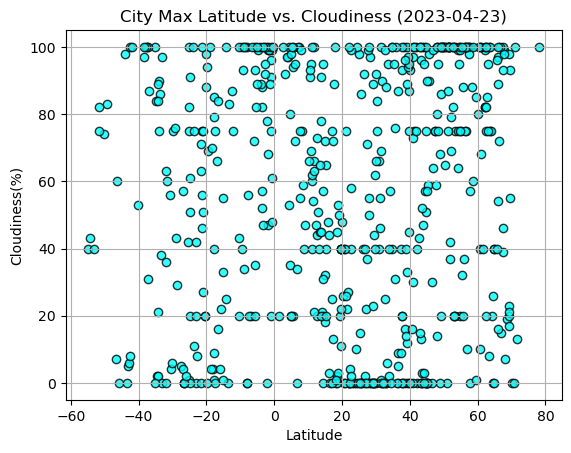

In [29]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], marker = "o", facecolors = "aqua", edgecolors = "black", alpha = 0.80)

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Cloudiness (2023-04-23)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness(%)")            
plt.grid(True)


# Save the figure
plt.savefig("Fig3.png")

# Show plot
plt.show()

## Latitude vs. Wind Speed Plot

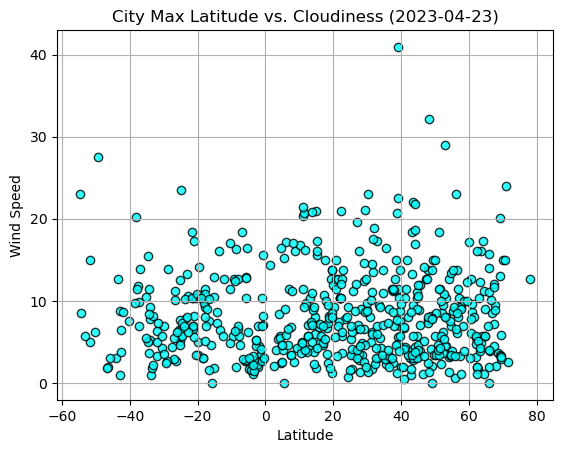

In [30]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], marker = "o", facecolors = "aqua", edgecolors = "black", alpha = 0.80)

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Cloudiness (2023-04-23)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")            
plt.grid(True)

# Save the figure
plt.savefig("Fig4.png")

# Show plot
plt.show()

## Requirement 2: Compute Linear Regression for Each Relationship

In [31]:
# Define a function to create Linear Regression plots
def linear_regress(x_values,y_values):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

In [32]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemisphere_data = city_data_df[city_data_df["Lat"] >= 0]
# Display sample data
northern_hemisphere_data.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,constantia,44.1833,28.6500,43.70,64,100,16.91,RO,1682631814
3,georgetown,5.4112,100.3354,80.53,94,20,0.00,MY,1682631840
4,la passe,45.5549,-0.8967,62.83,90,98,3.94,FR,1682631828
5,aasiaat,68.7098,-52.8699,25.97,90,19,3.67,GL,1682631841
7,waddan,29.1614,16.1390,71.13,36,0,12.37,LY,1682631842


In [33]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemisphere_data = city_data_df[city_data_df["Lat"] < 0]
 
# Display sample data
southern_hemisphere_data.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,lebu,-37.6167,-73.6500,58.37,92,100,11.86,CL,1682631840
2,port-aux-francais,-49.3500,70.2167,42.69,71,83,27.51,TF,1682631840
6,adamstown,-25.0660,-130.1015,74.95,65,100,5.08,PN,1682631841
10,grytviken,-54.2811,-36.5092,36.16,85,43,8.50,GS,1682631843
11,hermanus,-34.4187,19.2345,60.42,82,21,11.50,ZA,1682631577


## Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.8452772966861983


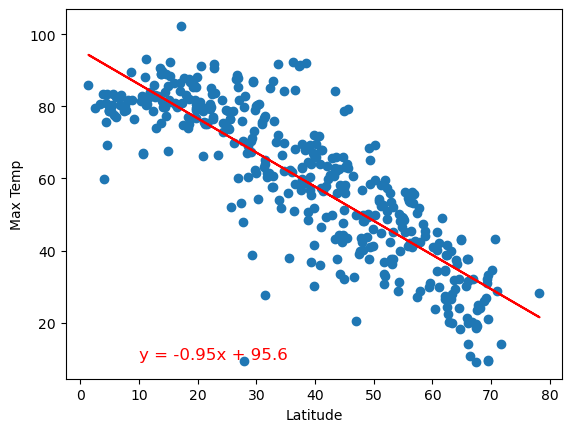

In [34]:
# Linear regression on Northern Hemisphere
x_values = northern_hemisphere_data["Latitude"]
y_values = northern_hemisphere_data["Max Temp"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
plt.scatter(x_values, y_values)

plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq,(10, 10),fontsize=12,color="red")

plt.xlabel("Latitude")
plt.ylabel("Max Temp")

print(f"The r-value is: {rvalue}")

plt.show()


The r-value is: 0.8113897994937022


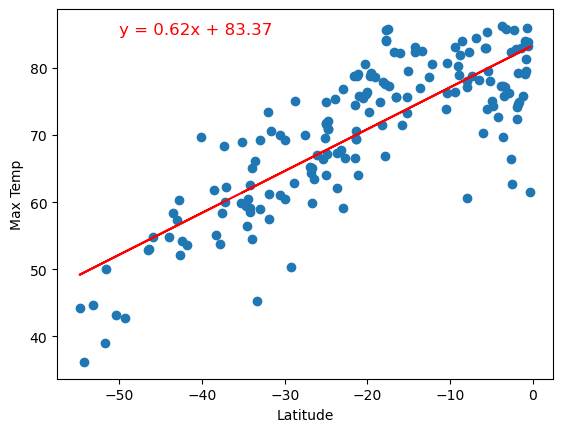

In [35]:
#Linear regression on Southern Hemisphere
x_values = southern_hemisphere_data["Lat"]
y_values = southern_hemisphere_data["Max Temp"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
plt.scatter(x_values, y_values)

plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq,(-50, 85),fontsize=12,color="red")

plt.xlabel("Latitude")
plt.ylabel("Max Temp")

print(f"The r-value is: {rvalue}")

plt.show()


### Discussion about the linear relationship: in the northern hemisphere, as the latitude increases the tempeature decreases while in the southern hemisphere it is the complete opposite.



## Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.1839488678672577


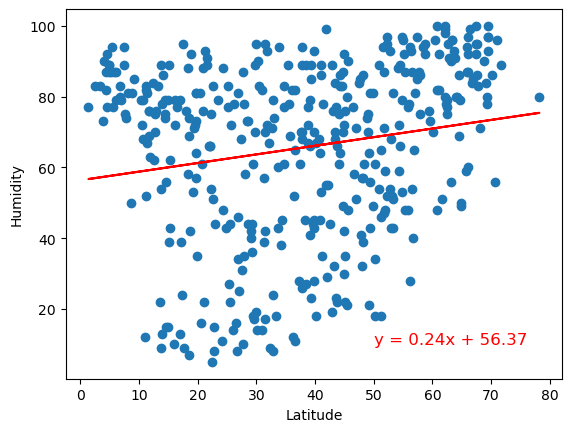

In [36]:
# Northern Hemisphere
x_values = northern_hemisphere_data["Lat"]
y_values = northern_hemisphere_data["Humidity"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
plt.scatter(x_values, y_values)

plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq,(50, 10),fontsize=12,color="red")

plt.xlabel("Latitude")
plt.ylabel("Humidity")

print(f"The r-value is: {rvalue}")

plt.show()

The r-value is: 0.2599065025963939


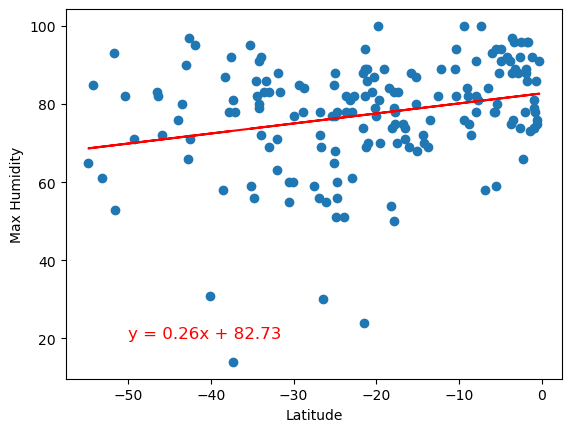

In [37]:
# Southern Hemisphere
x_values = southern_hemisphere_data["Lat"]
y_values = southern_hemisphere_data["Humidity"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
plt.scatter(x_values, y_values)

plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq,(-50, 20),fontsize=12,color="red")

plt.xlabel("Latitude")
plt.ylabel("Max Humidity")

print(f"The r-value is: {rvalue}")

plt.show()

### Discussion about the linear relationship: both the southern and the northern hemishere rise slightly in humidity as the latitude increases.


## Cloudiness vs. Latitude Linear Regression Plot

The r-value is: -0.07050842963006689


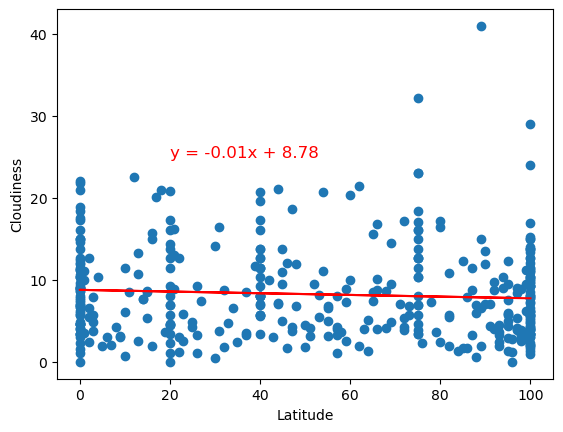

In [44]:
# Northern Hemisphere
x_values = northern_hemisphere_data["Cloudiness"]
y_values = northern_hemisphere_data["Wind Speed"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
plt.scatter(x_values, y_values)

plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq,(20, 25),fontsize=12,color="red")

plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

print(f"The r-value is: {rvalue}")

plt.show()

The r-value is: 0.04788963649717037


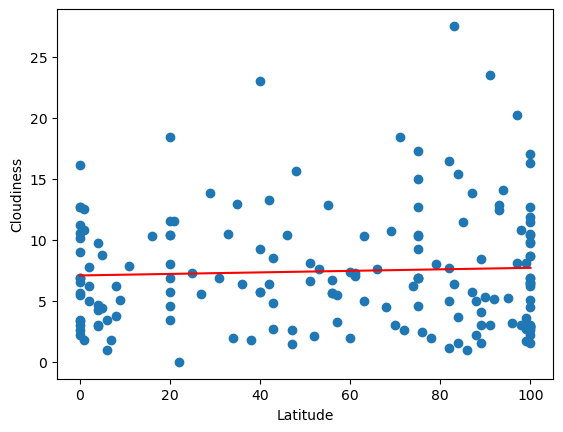

In [49]:
# Southern Hemisphere
x_values = southern_hemisphere_data["Cloudiness"]
y_values = southern_hemisphere_data["Wind Speed"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
plt.scatter(x_values, y_values)

plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq,(-30, 30),fontsize=12,color="red")

plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

print(f"The r-value is: {rvalue}")

plt.show()

### Discussion about the linear relationship: it seems in the northern hemisphere cloudiness drops as the latitude increases, the polar opposite happens with the southern but they are both very slight changes.


## Wind Speed vs. Latitude Linear Regression Plot


The r-value is: -0.014216009186785828


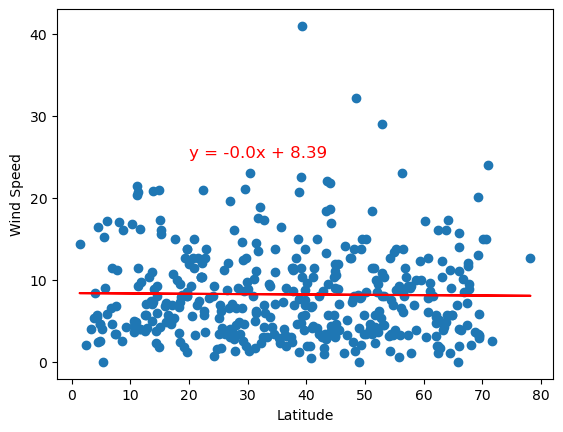

In [47]:
# Northern Hemisphere
x_values = northern_hemisphere_data["Lat"]
y_values = northern_hemisphere_data["Wind Speed"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
plt.scatter(x_values, y_values)

plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq,(20, 25),fontsize=12,color="red")

plt.xlabel("Latitude")
plt.ylabel("Wind Speed")

print(f"The r-value is: {rvalue}")

plt.show()

The r-value is: -0.1933979695858933


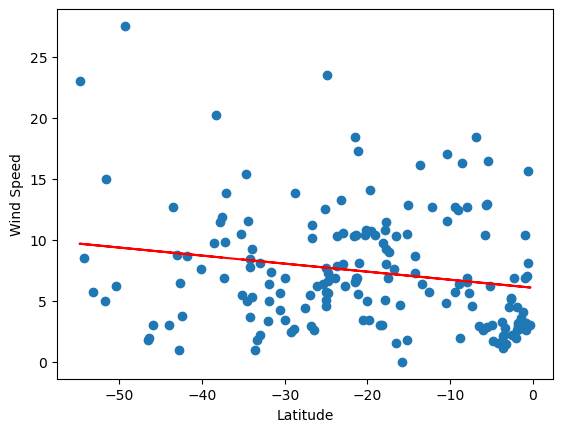

In [43]:
# Southern Hemisphere
x_values = southern_hemisphere_data["Lat"]
y_values = southern_hemisphere_data["Wind Speed"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
plt.scatter(x_values, y_values)

plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq,(-30, 30),fontsize=12,color="red")

plt.xlabel("Latitude")
plt.ylabel("Wind Speed")

print(f"The r-value is: {rvalue}")

plt.show()

### Discussion about the linear relationship: the nothern hemishpere wind speed seems to be pretty stable while the latitude increases. the southern hemishere wind speed decreases as the latitude increases.